## Phase II
### What makes a health trend popular at a certain time and how can we preedict trends?

#### Group members: Arssh Bajpai, Avery Darlington, Tej Chakravarthy, Anh Nguyen

### Introduction

Health-related search behavior provides a unique glimpse into the public's evolving interests, concerns, and needs over time. For example, terms like "intermittent fasting" may spike at the start of the New Year as individuals seek weight-loss strategies, while searches for "home workout routines" often increase during colder months or global events like the COVID-19 pandemic, when outdoor activities become less feasible. Analyzing these search trends can reveal emerging health topics and how external factors, such as seasonal changes or crises, influence public health priorities. This information is invaluable for health professionals, content creators, and organizations aiming to provide timely advice, as it allows them to tailor their interventions to the most pressing health concerns. Additionally, businesses in the health and wellness sectors can gain a competitive edge by predicting future trends, ensuring they meet emerging needs. By tracking historical search patterns, stakeholders can forecast when interest in specific health topics is likely to rise, enabling proactive measures and timely support. I'm essentially interested in whether or not health trends or fads correlate to times of the year and how they are effected by external events, We can also use predictive modeling and machine learning techniques to predict future health trends based on these trends so that people could possibly see what trend could be next.

### Data Collection

I plan to use Google Trends to collect data on various health-related search terms over time, focusing on topics such as "intermittent fasting," "home workouts," and "mental health." These searches represent current public interests and concerns in the health domain, allowing me to analyze trends that are relevant to my research questions. Google Trends provides a user-friendly interface and an API through the pytrends Python library, which facilitates the retrieval of historical search data for specific keywords. After retrieving data from this API, interest score is recorded for each search term over time using the logic below, which produces the final dataframe with cleaned search term, date, interest score, year, and month columns.

In [1]:
# Import necessary libraries
from pytrends.request import TrendReq
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# Initialize Google Trends API client
pytrends = TrendReq(hl='en-US', tz=360)

# Define expanded health-related search terms to analyze
health_terms = [
    "intermittent fasting", "home workouts", "mental health", "healthy eating", "meditation",
    "anxiety relief", "yoga benefits", "keto diet", "low carb diets", "meal prep ideas",
    "stress management", "sleep quality"
]

# Setting up the empty dictionary for Trend Data
trends_dict = {'search_term': list(),
               'date': list(),
               'interest_score': list(),
               'year': list(),
               'month': list()}

# Loop through the search terms and retrieve trend data
for term in health_terms:
    # Get interest over time data for each search term
    pytrends.build_payload([term], timeframe='all')
    trends_data = pytrends.interest_over_time()

    # If trends_data is empty, skip to the next term
    if trends_data.empty:
        continue

    # Extract relevant trend data
    for index, row in trends_data.iterrows():
        trends_dict['search_term'].append(term)
        trends_dict['date'].append(row.name)
        trends_dict['interest_score'].append(row[term])
        trends_dict['year'].append(row.name.year)
        trends_dict['month'].append(row.name.month)

# Convert dictionary to DataFrame
trends_df = pd.DataFrame(trends_dict)

# Save the DataFrame to a CSV file
trends_df.to_csv('health_trends_data.csv', index=False)

print("Data has been saved to 'health_trends_data.csv'")


/Users/averydarlington/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TooManyRequestsError: The request failed: Google returned a response with code 429

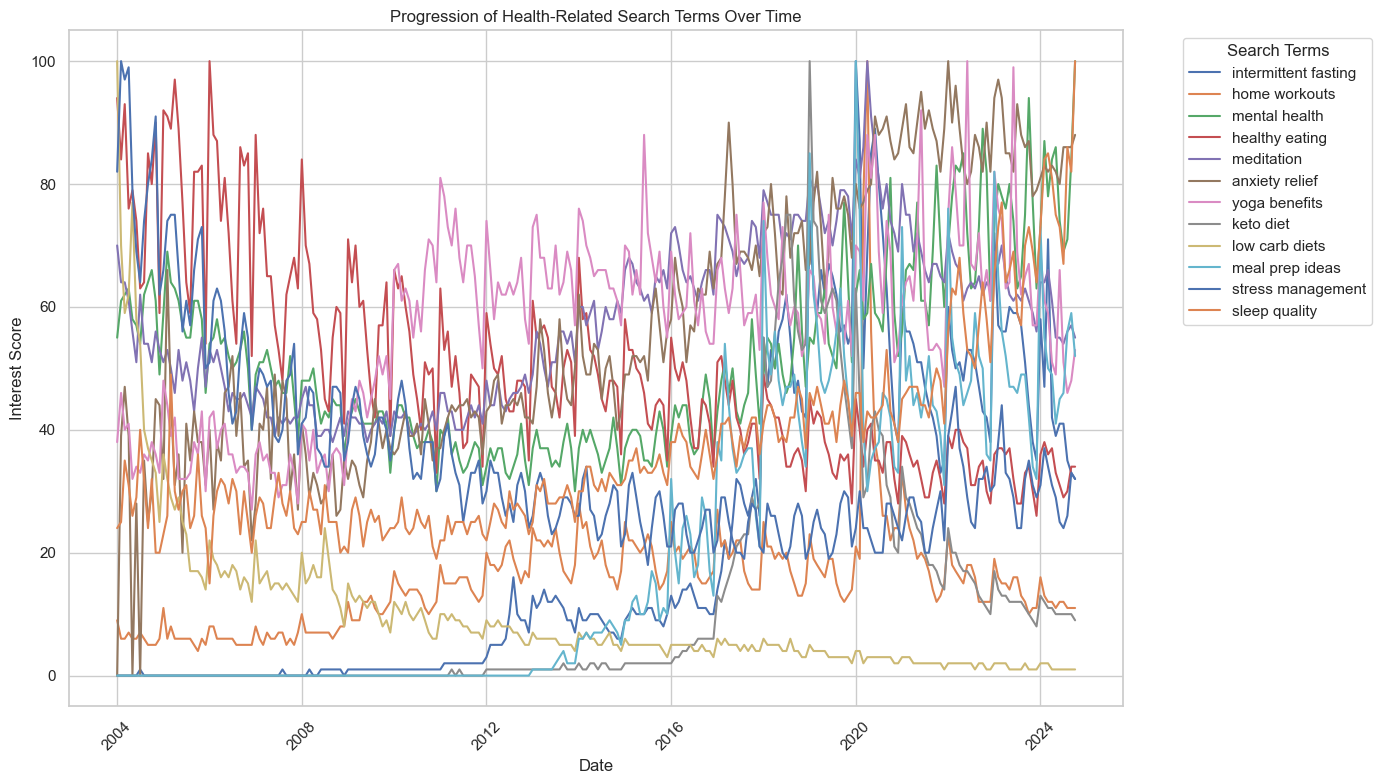

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data from the CSV file
trends_df = pd.read_csv('health_trends_data.csv')

# Convert the 'date' column to datetime format
trends_df['date'] = pd.to_datetime(trends_df['date'])

# Initialize the plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Loop through each search term and plot its progression over time
for term in trends_df['search_term'].unique():
    term_data = trends_df[trends_df['search_term'] == term]
    plt.plot(term_data['date'], term_data['interest_score'], label=term)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.title('Progression of Health-Related Search Terms Over Time')
plt.legend(title='Search Terms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

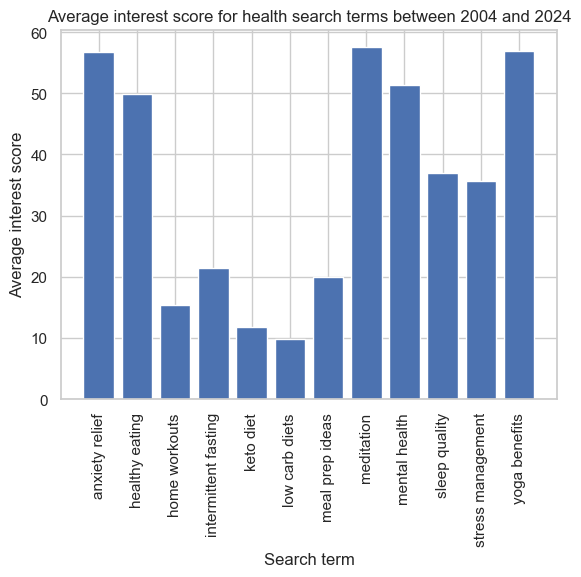

In [3]:
# For each health trend search term, calculate the average interest score over the past 20 years
overall_avg_score = trends_df.groupby("search_term")["interest_score"].mean().reset_index()

# Plot 10-year overall interest score on a bar plot
plt.bar(overall_avg_score["search_term"], overall_avg_score["interest_score"])
plt.xticks(rotation = 90)
plt.xlabel("Search term")
plt.ylabel("Average interest score")
plt.title("Average interest score for health search terms between 2004 and 2024")
plt.show()

The first line plot helps us compare the general pattern of the interest in each health-related search terms between 2004 and 2024. From this plot, we can have a better idea of certain times in the past where specific health trends became popular, as well as compare the distribution in interest in these trends over time. The second bar plot gives us a clearer idea of which 

### Data Usage and Remaining Issues

The current health trends dataset utilizes Google Trends data to track the popularity of various health-related topics such as intermittent fasting, home workouts, mental health, healthy eating, and meditation. This data provides insights into how interest in these topics fluctuates over time, allowing for trend analysis on a daily, monthly, or yearly basis. While the dataset is useful for understanding broad patterns in public interest, there are a few remaining issues. First, Google Trends data may be influenced by region-specific biases, and without filtering by geographical location, the results might not reflect trends in specific countries or areas. Additionally, the dataset only captures relative search interest rather than actual engagement or behavior, limiting its use for deeper, action-based health insights. Lastly, data gaps (e.g., missing values for certain time periods) may affect the continuity and analysis of long-term trends, requiring careful handling of missing data during preprocessing.

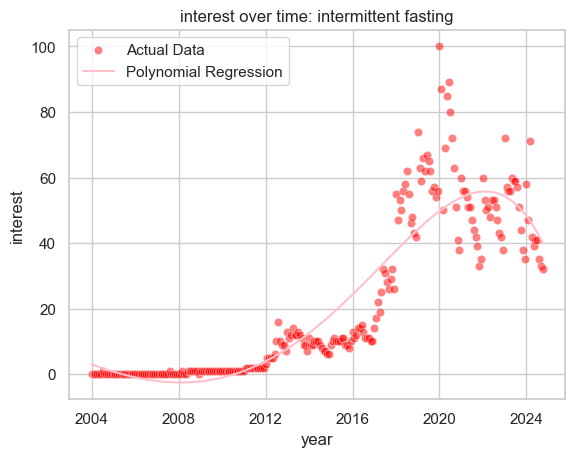

0.8366149046866498


In [30]:
def polynomial_regression(x, y, degree=6, learning_rate=0.05, iterations=15000):
    """
   calculates the polynomial regression on our data based of its gradient.
   
   args:
       x (list): time in years, X axis 
       y (list): our interest score values
       degree (int): degree of the polynomial regression 
       learning rate (float): learning rate for gradient
       iterations (int): Number of training iterations
   
   Returns:
       list: Predicted y-values using fitted polynomial curve
    """
    
    # normalizing X
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    
    # builds a features matrix 
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for int in range(iterations):

        # calculates our errors
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y)]
        
        # changes weights according to the gradient
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2/len(y)
            weights[i] -= learning_rate * gradient
            
    return [sum(w * f for w, f in zip(weights, feat)) for feat in features]

# our data
term_data = trends_df[trends_df['search_term'] == "intermittent fasting"]
x = list(range(len(term_data)))
y = list(term_data['interest_score'])

# regression
y_pred = polynomial_regression(x, y)


# building our polynomial regression visual ------------------------------------------------------------
sns.set_theme(style="whitegrid")
sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')

# regression line
plt.plot(term_data['date'], y_pred, color='pink', label='Polynomial Regression')

plt.title(f'interest over time: {term}')
plt.xlabel('year')
plt.ylabel('interest') 
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------------

# we take our avg of actual data, our total variance, squared error between pred and actual, and find r2
y_mean = sum(y) / len(y)
total_var = sum((yi - y_mean) ** 2 for yi in y)
errorPred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
r2 = 1 - (errorPred / total_var)
print(r2)

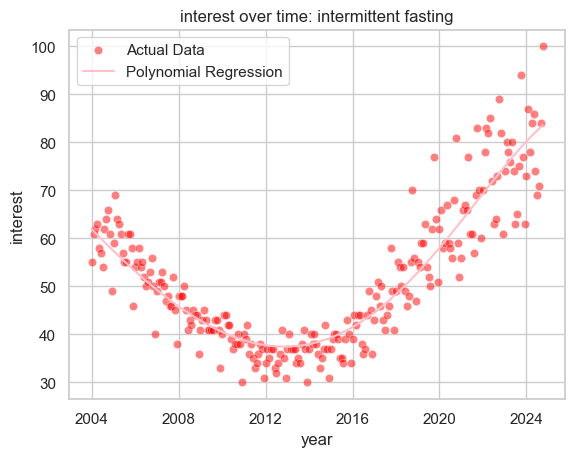

0.8498876061744343


In [31]:
def polynomial_regression(x, y, degree=6, learning_rate=0.05, iterations=15000):
    """
   calculates the polynomial regression on our data based of its gradient.
   
   args:
       x (list): time in years, X axis 
       y (list): our interest score values
       degree (int): degree of the polynomial regression 
       learning rate (float): learning rate for gradient
       iterations (int): Number of training iterations
   
   Returns:
       list: Predicted y-values using fitted polynomial curve
    """
    
    # normalizing X
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    
    # builds a features matrix 
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for int in range(iterations):

        # calculates our errors
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y)]
        
        # changes weights according to the gradient
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2/len(y)
            weights[i] -= learning_rate * gradient
            
    return [sum(w * f for w, f in zip(weights, feat)) for feat in features]

# our data
term_data = trends_df[trends_df['search_term'] == "mental health"]
x = list(range(len(term_data)))
y = list(term_data['interest_score'])

# regression
y_pred = polynomial_regression(x, y)


# building our polynomial regression visual ------------------------------------------------------------
sns.set_theme(style="whitegrid")
sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')

# regression line
plt.plot(term_data['date'], y_pred, color='pink', label='Polynomial Regression')

plt.title(f'interest over time: {term}')
plt.xlabel('year')
plt.ylabel('interest') 
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------------

# we take our avg of actual data, our total variance, squared error between pred and actual, and find r2
y_mean = sum(y) / len(y)
total_var = sum((yi - y_mean) ** 2 for yi in y)
errorPred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
r2 = 1 - (errorPred / total_var)
print(r2)

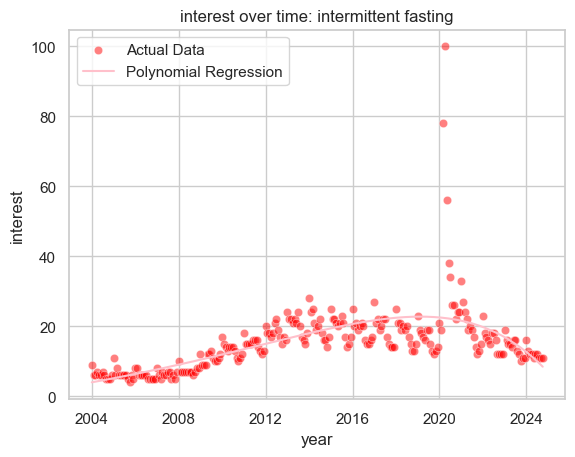

0.3828850722939453


In [32]:
def polynomial_regression(x, y, degree=6, learning_rate=0.05, iterations=15000):
    """
   calculates the polynomial regression on our data based of its gradient.
   
   args:
       x (list): time in years, X axis 
       y (list): our interest score values
       degree (int): degree of the polynomial regression 
       learning rate (float): learning rate for gradient
       iterations (int): Number of training iterations
   
   Returns:
       list: Predicted y-values using fitted polynomial curve
    """
    
    # normalizing X
    x_norm = [(val - min(x)) / (max(x) - min(x)) for val in x]
    
    # builds a features matrix 
    features = [[x_i**d for d in range(degree + 1)] for x_i in x_norm]
    
    # Initialize weights and train
    weights = [0] * (degree + 1)
    for int in range(iterations):

        # calculates our errors
        pred = [sum(w * f for w, f in zip(weights, feat)) for feat in features]
        errors = [p - actual for p, actual in zip(pred, y)]
        
        # changes weights according to the gradient
        for i in range(degree + 1):
            gradient = sum(e * f[i] for e, f in zip(errors, features)) * 2/len(y)
            weights[i] -= learning_rate * gradient
            
    return [sum(w * f for w, f in zip(weights, feat)) for feat in features]

# our data
term_data = trends_df[trends_df['search_term'] == "home workouts"]
x = list(range(len(term_data)))
y = list(term_data['interest_score'])

# regression
y_pred = polynomial_regression(x, y)


# building our polynomial regression visual ------------------------------------------------------------
sns.set_theme(style="whitegrid")
sns.scatterplot(data=term_data, x='date', y='interest_score', color='red', alpha=0.5, label='Actual Data')

# regression line
plt.plot(term_data['date'], y_pred, color='pink', label='Polynomial Regression')

plt.title(f'interest over time: {term}')
plt.xlabel('year')
plt.ylabel('interest') 
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------------------------

# we take our avg of actual data, our total variance, squared error between pred and actual, and find r2
y_mean = sum(y) / len(y)
total_var = sum((yi - y_mean) ** 2 for yi in y)
errorPred = sum((yi - yp) ** 2 for yi, yp in zip(y, y_pred))
r2 = 1 - (errorPred / total_var)
print(r2)